# Sparse Hebbian Learning with full homeostasis : testing different rescaling functions

In this notebook, we test the convergence of SparseNet as a function of different parameters tuning the quantization. These parameters only influence the way we select dictionary elements and thus the homeostasis.



In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(precision=2, suppress=True)

In [2]:
from shl_scripts.shl_experiments import SHL

list_figures = ['show_dico']#, 'plot_variance',  'plot_variance_histogram',  'time_plot_prob',  'time_plot_kurt',  'time_plot_var']
DEBUG_DOWNSCALE, verbose = 10, 0
DEBUG_DOWNSCALE, verbose = 10, 100
DEBUG_DOWNSCALE, verbose = 1, 0
tag = 'rescaling'

N_scan = 7
n_jobs = 1
homeo_params = dict(eta_homeo=0.05, alpha_homeo=0.02, C=5., nb_quant=128, P_cum=None)
opts = dict(DEBUG_DOWNSCALE=DEBUG_DOWNSCALE, homeo_method='HEH', homeo_params=homeo_params, verbose=verbose)
shl = SHL(**opts)
data = shl.get_data(matname='data')

In [3]:
!ls -l data_cache/{tag}*

ls: data_cache/rescaling*: No such file or directory


In [ ]:
homeo_params = shl.homeo_params
homeo_params

{'C': 5.0,
 'P_cum': None,
 'alpha_homeo': 0.02,
 'eta_homeo': 0.05,
 'nb_quant': 128}

We will use the ``joblib`` package do distribute this computation on different CPUs.

## different rescaling values

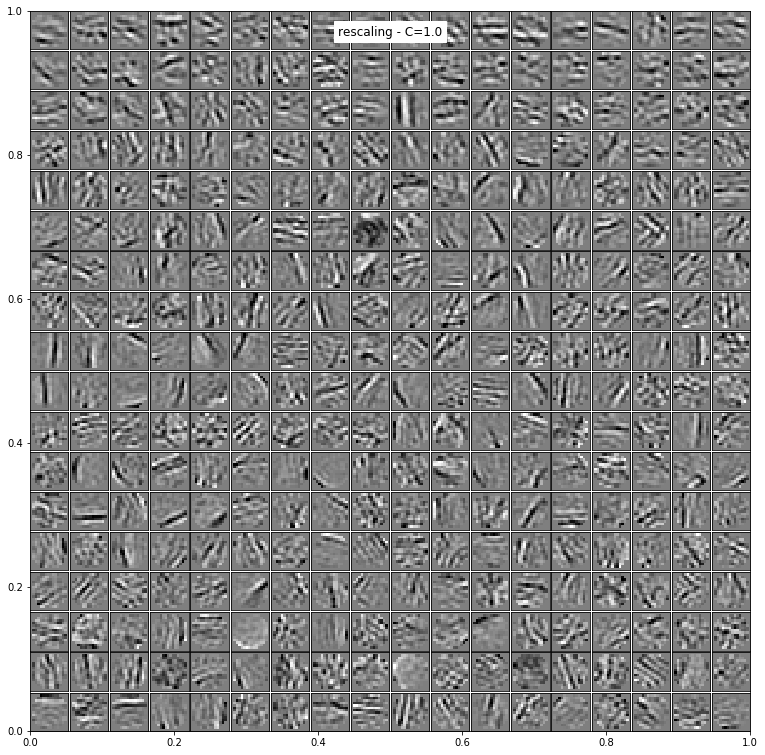

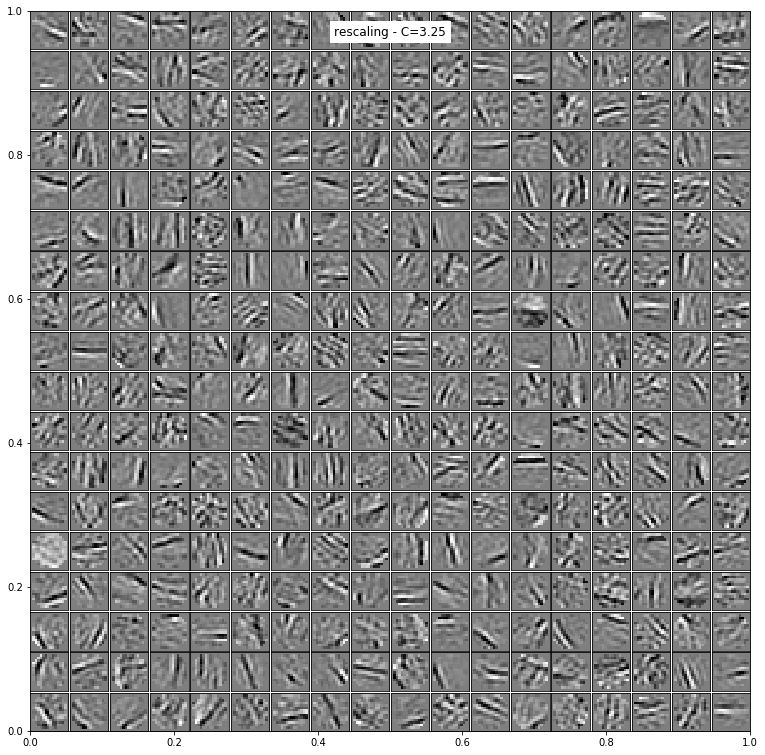

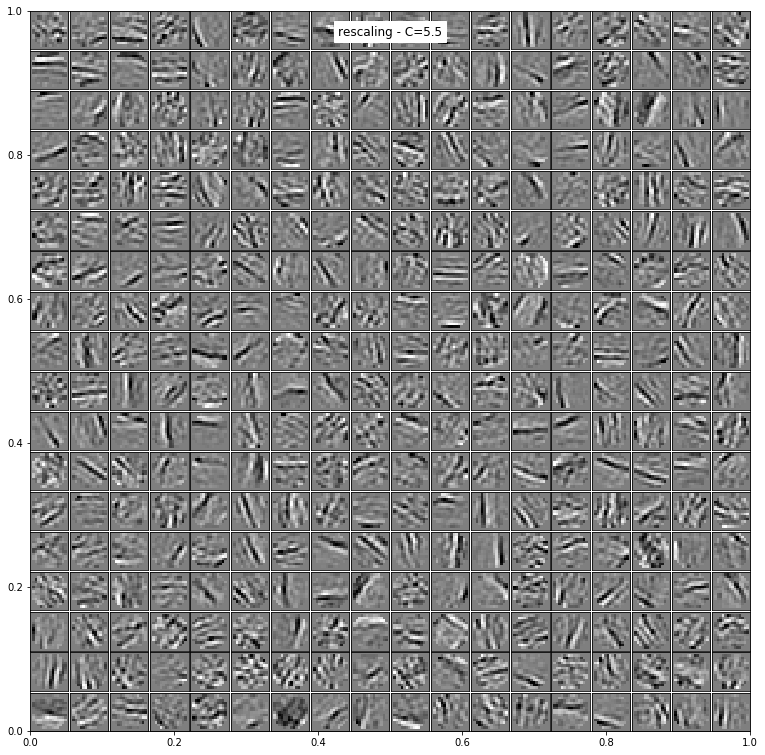

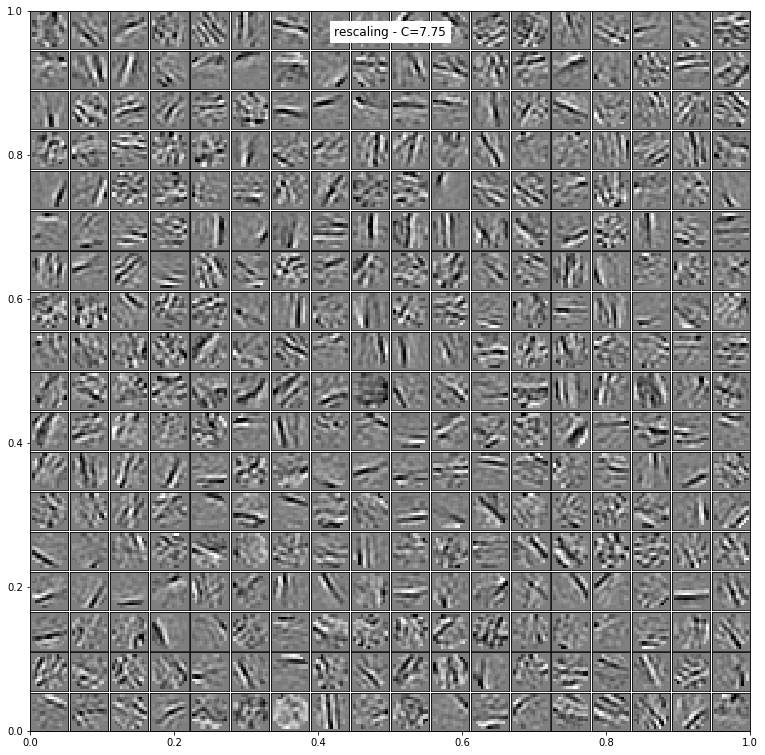

In [ ]:
from joblib import Parallel, delayed

def run(C, list_figures, data, homeo_params):
    matname = tag + ' - C={}'.format(C)
    homeo_params.update(C=C)
    opts.update(homeo_params=homeo_params)
    shl = SHL(**opts)
    dico = shl.learn_dico(data=data, matname=matname, list_figures=list_figures)
    return dico


Cs = np.linspace(1, 10, 5)
if not n_jobs==1: out = Parallel(n_jobs=n_jobs, verbose=15)(delayed(run)(C, [], data, homeo_params) for C in Cs)

for C in Cs:
    dico = run(C, list_figures=list_figures, data=data, homeo_params=homeo_params)
    plt.show()

## different quantization parameters

with a fixed $C=5.$

In [ ]:
from joblib import Parallel, delayed
def run(nb_quant, list_figures, data, homeo_params=homeo_params):
    matname = tag + ' - nb_quant={}'.format(nb_quant)
    shl = SHL(**opts)
    homeo_params=shl.homeo_params
    homeo_params.update(C=5., nb_quant=nb_quant)
    opts.update(homeo_params=homeo_params)
    
    dico = shl.learn_dico(data=data, matname=matname, list_figures=list_figures)
    return dico

nb_quants = 2 ** np.arange(3, 9)
if not n_jobs==1: out = Parallel(n_jobs=n_jobs, verbose=15)(delayed(run)(int(nb_quant), [], data, homeo_params) for nb_quant in  nb_quants)

for nb_quant in  nb_quants:
    dico = run(nb_quant, list_figures=list_figures, data=data, homeo_params=homeo_params)

    plt.show()

In [ ]:
shl = SHL(**opts)
homeo_params = shl.homeo_params
homeo_params

In [ ]:
print(homeo_params.update(eta_homeo=42))

with an adaptive rescaling function ($C=0.$)

## Version used

In [ ]:
%load_ext version_information
%version_information numpy, shl_scripts